In [131]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

data = pd.read_csv('StudentsPerformance.csv')
#print(data.head())

numeric_data = data.replace(['male', 'female'], [0,1])
numeric_data = numeric_data.replace(['group A', 'group B', 'group C', 'group D', 'group E'], [0,1,2,3,4])
numeric_data = numeric_data.replace(['some high school', 'high school', 'some college', "associate's degree"
                                     , "bachelor's degree", "master's degree"], [0,1,2,3,4,5])
numeric_data = numeric_data.replace(['free/reduced', 'standard'], [0,1])
numeric_data = numeric_data.replace(['none', 'completed'], [0,1])
numeric_data = numeric_data.values

numeric_scores = numeric_data[:,5:8]
features = np.zeros((len(numeric_data),5))
numeric_data = np.append(numeric_data,features,1)
j=1
for i in range(len(numeric_data)):
    if numeric_data[i][j] == 'group A':
        numeric_data[i][8:13] = [1,0,0,0,0]
    if numeric_data[i][j] == 'group B':
        numeric_data[i][8:13] = [0,1,0,0,0]
    if numeric_data[i][j] == 'group C':
        numeric_data[i][8:13] = [0,0,1,0,0]
    if numeric_data[i][j] == 'group D':
        numeric_data[i][8:13] = [0,0,0,1,0] 
    if numeric_data[i][j] == 'group E':
        numeric_data[i][8:13] = [0,0,0,0,1] 

#eliminate original race columns
numeric_data = np.delete(numeric_data, 1, 1)
numeric_data.astype(float)


#eliminate individual scores
numeric_data = np.delete(numeric_data,4,1)
numeric_data = np.delete(numeric_data,4,1)
numeric_data = np.delete(numeric_data,4,1)
    

combined_score = []
for i in range(len(numeric_scores[:, 0])):
    score = numeric_scores[i, 0]+numeric_scores[i, 1]+numeric_scores[i, 2]
    combined_score.append(score)

combined_score_df = pd.DataFrame({'combined_score': combined_score})
#numeric_data.join(combined_score_df)
#numeric_data = np.append(numeric_data, combined_score_df, axis=1)
#print(numeric_data)

threshold = 210 #average of 70% per test

passed = []
for i in range(len(numeric_scores[:, 0])):
    temp = combined_score[i]
    if(temp>=threshold):
        passed.append(1)
    else:
        passed.append(0)

passed_df = pd.DataFrame({'passed': passed})
#numeric_data.join(combined_score_df)
#numeric_data = np.append(numeric_data, passed_df, axis=1)
#print(passed)

X = numeric_data
y = passed_df

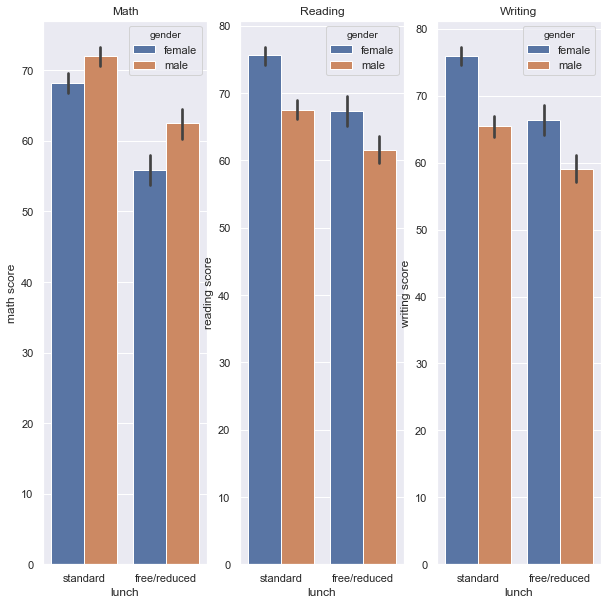

In [133]:
figure(figsize=(10,10))
plt.subplot(1, 3, 1)
sns.barplot(x='lunch',y='math score',data=data,hue='gender')
plt.title('Math')
plt.subplot(1, 3, 2)
sns.barplot(x='lunch',y='reading score',data=data,hue='gender')
plt.title('Reading')
plt.subplot(1, 3, 3)
sns.barplot(x='lunch',y='writing score',data=data,hue='gender')
plt.title('Writing')
plt.show()

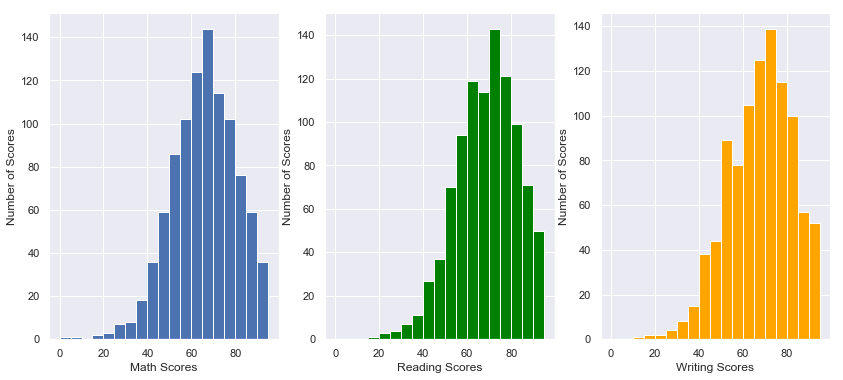

In [125]:
bins = np.arange(start=0, stop=100, step=5)

plt.subplot(1, 3, 1)
data['math score'].hist(bins=bins, figsize=[14,6])
plt.xlabel("Math Scores")
plt.ylabel("Number of Scores")
plt.subplot(1, 3, 2)
data['reading score'].hist(bins=bins, figsize=[14,6], color='green')
plt.xlabel("Reading Scores")
plt.ylabel("Number of Scores")
plt.subplot(1, 3, 3)
data['writing score'].hist(bins=bins, figsize=[14,6], color='orange')
plt.xlabel("Writing Scores")
plt.ylabel("Number of Scores")
plt.show()

P    677
F    323
Name: math_pass, dtype: int64


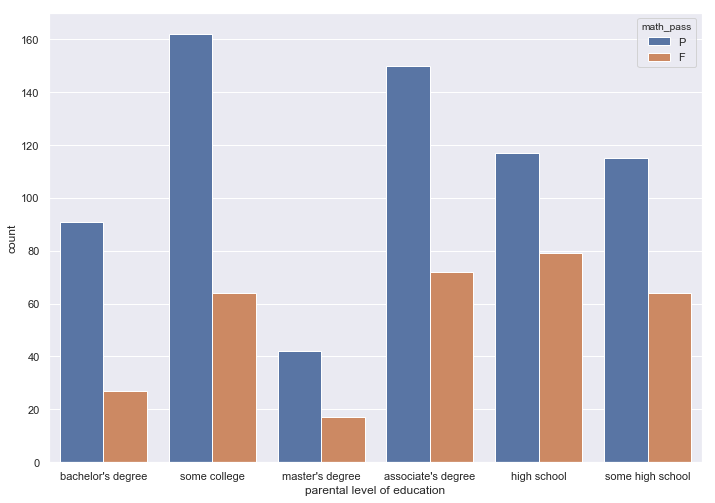

In [86]:
data['math_pass'] = np.where(data['math score']<60, 'F', 'P')
print(data.math_pass.value_counts())

p = sns.countplot(x='parental level of education', data = data, hue='math_pass')

P    746
F    254
Name: reading_pass, dtype: int64


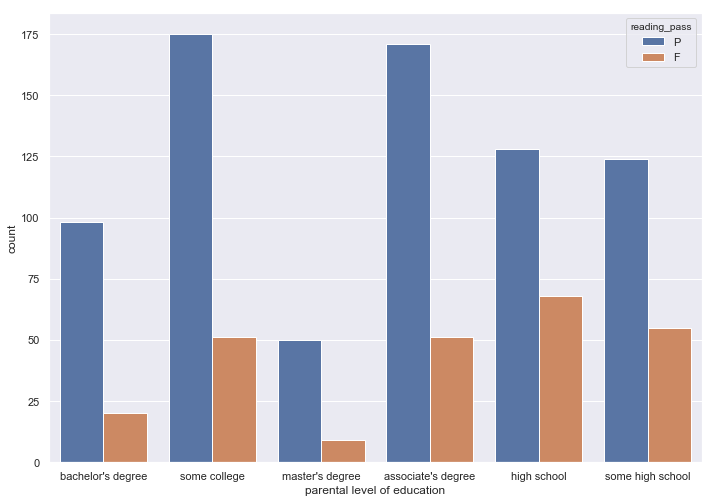

In [84]:
data['reading_pass'] = np.where(data['reading score']<60, 'F', 'P')
print(data.reading_pass.value_counts())

p = sns.countplot(x='parental level of education', data = data, hue='reading_pass')

P    719
F    281
Name: writing_pass, dtype: int64


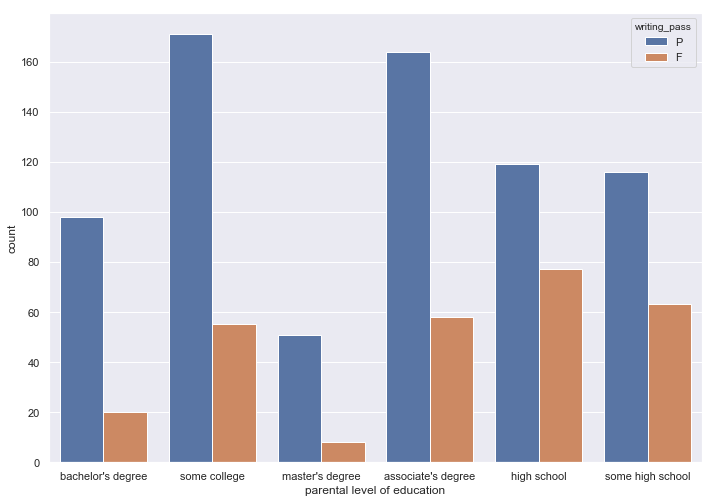

In [85]:
data['writing_pass'] = np.where(data['writing score']<60, 'F', 'P')
print(data.writing_pass.value_counts())

p = sns.countplot(x='parental level of education', data =data, hue='writing_pass')

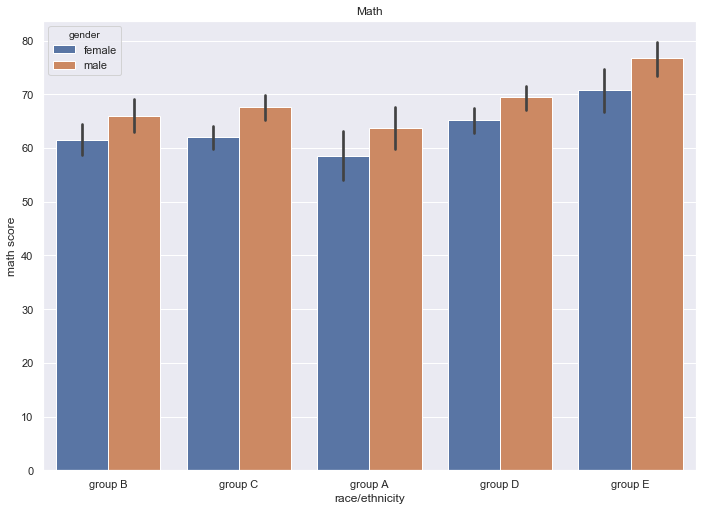

In [106]:
sns.barplot(x='race/ethnicity',y='math score',data=data,hue='gender')
plt.title('Math')

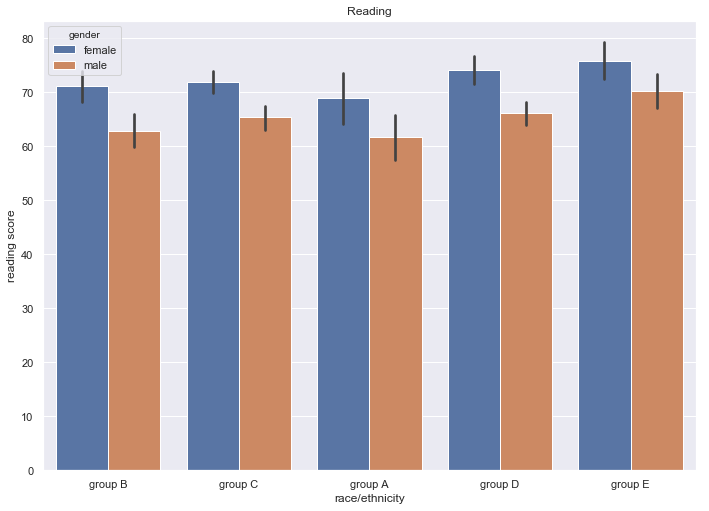

In [104]:
sns.barplot(x='race/ethnicity',y='reading score',data=data,hue='gender')
plt.title('Reading')

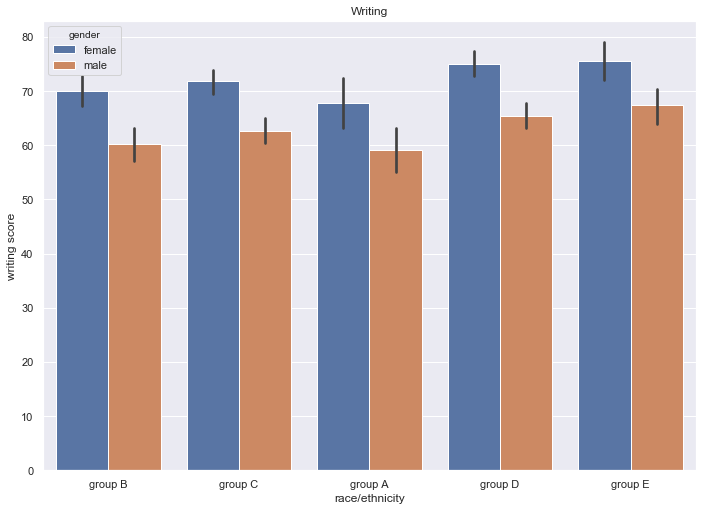

In [105]:
sns.barplot(x='race/ethnicity',y='writing score',data=data,hue='gender')
plt.title('Writing')

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(750, 9)
(250, 9)
(750, 1)
(250, 1)


In [177]:
model = LogisticRegression(solver='lbfgs')
%time model.fit(X_train, Y_train.values.ravel())

y_pred = model.predict(X_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test, Y_test))

param_grid = [
  {"C":np.logspace(-3,3,7), 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
  {'penalty': ['l2'], 'solver': ['lbfgs', 'sag', 'newton-cg']},
 ]
grid = GridSearchCV(model, param_grid, cv=12, scoring = 'accuracy', )

grid.fit(X_train,Y_train.values.ravel())

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)



tuned_model = LogisticRegression(C=0.10000000000000001, solver='lbfgs', penalty='l2')
tuned_model.fit(X_train, Y_train.values.ravel())
y_pred = tuned_model.predict(X_test)

# calculating the classification accuracies
print("Training Accuracy :", tuned_model.score(X_train, Y_train))
print("Testing Accuracy :", tuned_model.score(X_test, Y_test))

CPU times: user 8.59 ms, sys: 1.26 ms, total: 9.85 ms
Wall time: 6.18 ms
Training Accuracy : 0.644
Testing Accuracy : 0.696
tuned hpyerparameters :(best parameters)  {'C': 0.10000000000000001, 'penalty': 'l2'}
accuracy : 0.64
Training Accuracy : 0.644
Testing Accuracy : 0.688


In [167]:
print(np.logspace(-3,3,7))

[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
   1.00000000e+01   1.00000000e+02   1.00000000e+03]
